In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# --- 1. Load Your Enriched Data from Task 2 ---
try:
    # IMPORTANT: Use the final CSV you created in Task 2
    df = pd.read_csv(r'C:\Users\Dar Computers\Desktop\10Acadamy\week 2\Customer_Experience_Analytics_for_Fintech_Apps\task2_sentiment_themes.csv')
    print("✅ Enriched CSV data loaded successfully.")
    print("\nAvailable columns:", df.columns.tolist())
except FileNotFoundError:
    print("❌ Error: 'task2_sentiment_themes.csv' not found. Please check the file path.")
    sys.exit()

# Ensure the 'bank' column has a consistent name
# Let's assume your sentiment column is named 'sentiment_label' and theme column is 'identified_theme'
# If your column names are different, please adjust them here!
SENTIMENT_COL = 'sentiment_label' 
THEME_COL = 'themes' 

print(f"\nData preview:\n{df.head()}")

✅ Enriched CSV data loaded successfully.

Available columns: ['review', 'rating', 'date', 'bank', 'source', 'sentiment_label', 'sentiment_score', 'themes']

Data preview:
                                              review  rating        date bank  \
0                                          thank you       5  2025-07-30  CBE   
1  they been freezing a transfered money till the...       1  2025-07-30  CBE   
2                               how updated this app       5  2025-07-30  CBE   
3                                       Time is Gold       5  2025-07-28  CBE   
4  this app is so amazing a use it every time whe...       5  2025-07-27  CBE   

        source sentiment_label  sentiment_score                   themes  
0  Google Play        Positive            1.000                    Other  
1  Google Play        Negative            0.998  Transaction Performance  
2  Google Play        Positive            0.908                    Other  
3  Google Play        Positive            

In [9]:
# --- 2. Derive Insights ---
print("\n--- INSIGHTS DERIVATION ---")

# Insight 1: What are the biggest PAIN POINTS for each bank?
# We filter for 'Negative' reviews and count the themes.
pain_points = df[df[SENTIMENT_COL] == 'Negative'].groupby('bank')[THEME_COL].value_counts()
print("\n[EVIDENCE] Top Pain Points (Themes in Negative Reviews):")
print(pain_points)

# Insight 2: What are the biggest satisfaction DRIVERS for each bank?
# We filter for 'Positive' reviews and count the themes.
drivers = df[df[SENTIMENT_COL] == 'Positive'].groupby('bank')[THEME_COL].value_counts()
print("\n[EVIDENCE] Top Satisfaction Drivers (Themes in Positive Reviews):")
print(drivers)

# Insight 3: Direct Bank Comparison on a specific theme
# Let's compare how banks perform on 'Transaction Performance'
transaction_issues = df[df[THEME_COL] == 'Transaction Performance']['bank'].value_counts()
print("\n[EVIDENCE] Comparison of 'Transaction Performance' Issues by Bank:")
print(transaction_issues)


--- INSIGHTS DERIVATION ---

[EVIDENCE] Top Pain Points (Themes in Negative Reviews):
bank    themes                                                          
BOA     Other                                                               291
        Transaction Performance                                              75
        Account Access Issues                                                18
        Customer Support                                                     14
        Transaction Performance, Customer Support                             7
        User Interface & Experience                                           6
        Feature Requests                                                      4
        Account Access Issues, Transaction Performance                        3
        Transaction Performance, Feature Requests                             3
        Transaction Performance, User Interface & Experience                  2
        Account Access Issues, Feature R


✅ Saved '1_sentiment_by_bank.png'


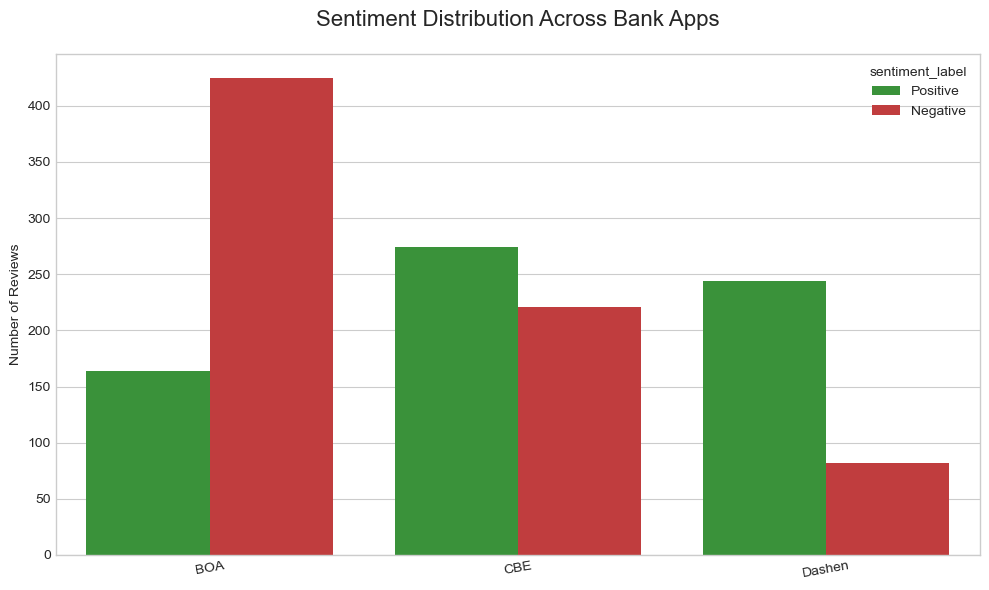

In [13]:
# --- 3. Create Visualizations ---

plt.style.use('seaborn-v0_8-whitegrid')

# Plot 1: Sentiment Distribution by Bank
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='bank', hue=SENTIMENT_COL, order=df['bank'].value_counts().index,
              palette={'Positive':'#2ca02c', 'Neutral':'#ff7f0e', 'Negative':'#d62728'})
plt.title('Sentiment Distribution Across Bank Apps', fontsize=16, pad=20)
plt.ylabel('Number of Reviews')
plt.xlabel('')
plt.xticks(rotation=10)
plt.tight_layout()
plt.savefig(r'C:\Users\Dar Computers\Desktop\10Acadamy\week 2\Customer_Experience_Analytics_for_Fintech_Apps\visuals/1_sentiment_by_bank.png')
print("\n✅ Saved '1_sentiment_by_bank.png'")
plt.show()

✅ Saved clean version: '2_themes_by_bank_clean.png'


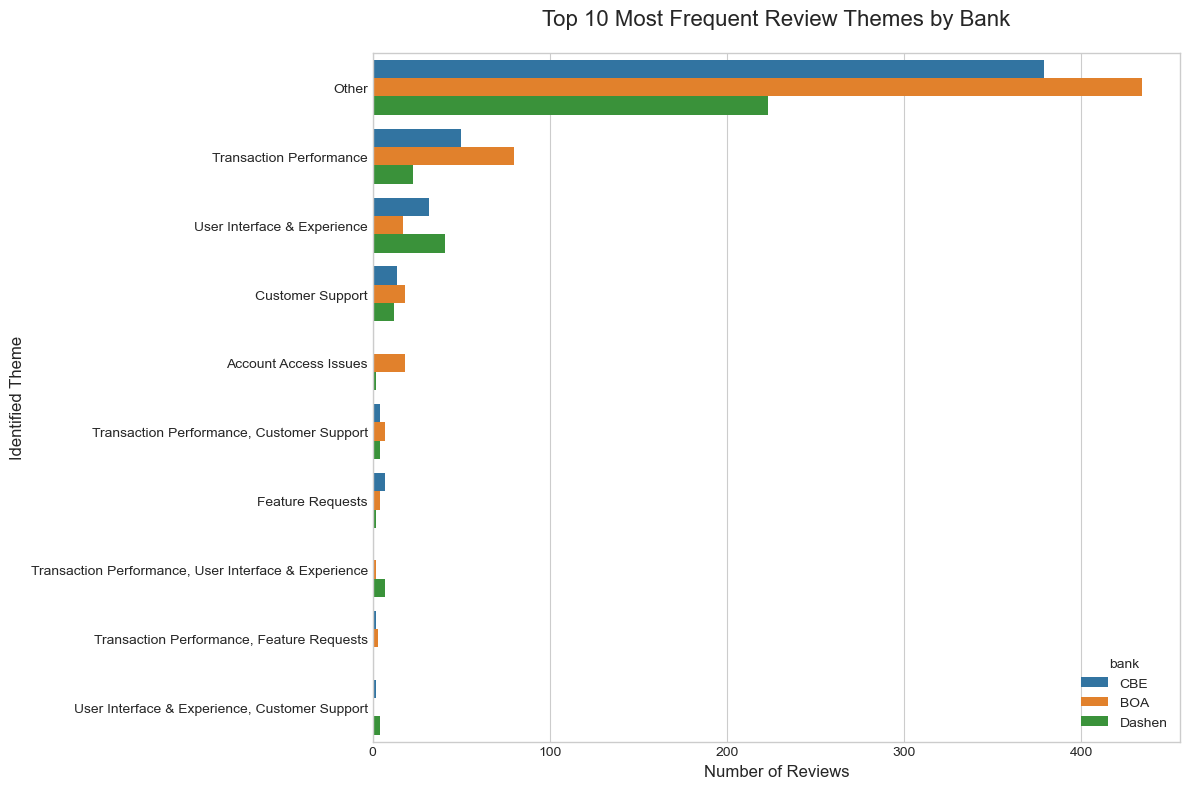

In [27]:
# --- FIX: Filter for Top N Themes Before Plotting ---

# 1. Define how many top themes you want to show. 10 is usually a good number.
top_n = 10

# 2. Get the list of the top N most frequent themes from your data.
top_themes = df[THEME_COL].value_counts().nlargest(top_n).index

# 3. Create a new DataFrame that ONLY contains the rows with these top themes.
df_filtered_themes = df[df[THEME_COL].isin(top_themes)]


# 4. PLOT THE FILTERED DATA
# Now, we use the new 'df_filtered_themes' DataFrame for plotting.
plt.figure(figsize=(12, 8))
sns.countplot(
    data=df_filtered_themes,  # Use the filtered data
    y=THEME_COL,
    hue='bank',
    order=top_themes          # Order the bars using the list we created
)

plt.title(f'Top {top_n} Most Frequent Review Themes by Bank', fontsize=16, pad=20)
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Identified Theme', fontsize=12)
plt.tight_layout() # Adjusts plot to ensure everything fits without overlapping
plt.savefig(r'C:\Users\Dar Computers\Desktop\10Acadamy\week 2\Customer_Experience_Analytics_for_Fintech_Apps\visuals/2_themes_by_bank_clean.png')
print("✅ Saved clean version: '2_themes_by_bank_clean.png'")
plt.show()

C:\Users\Dar Computers\AppData\Local\Temp\ipykernel_15580\4261456014.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=df, x='rating', col='bank', kind='count', palette='viridis', height=5, aspect=0.8)


✅ Saved '3_rating_distribution.png'


<Figure size 1200x700 with 0 Axes>

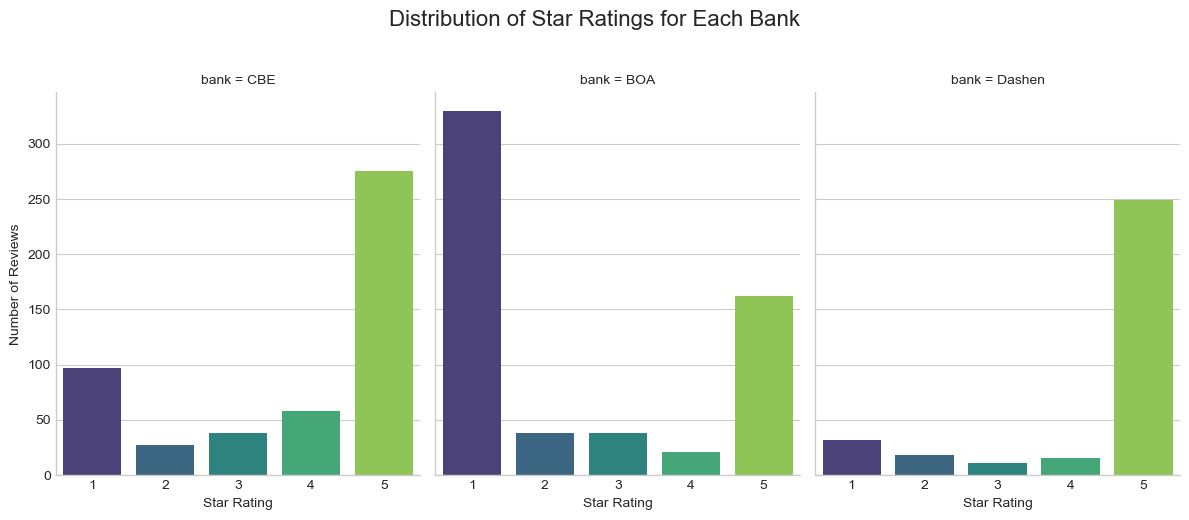

In [17]:
# Plot 3: Distribution of Star Ratings
plt.figure(figsize=(12, 7))
g = sns.catplot(data=df, x='rating', col='bank', kind='count', palette='viridis', height=5, aspect=0.8)
g.fig.suptitle('Distribution of Star Ratings for Each Bank', y=1.03, fontsize=16)
g.set_axis_labels('Star Rating', 'Number of Reviews')
plt.tight_layout()
plt.savefig(r'C:\Users\Dar Computers\Desktop\10Acadamy\week 2\Customer_Experience_Analytics_for_Fintech_Apps\visuals\3_rating_distribution.png')
print("✅ Saved '3_rating_distribution.png'")
plt.show()


--- Insight 1: 'Love it or Hate it' Factor ---

[EVIDENCE] Standard Deviation of Ratings (Higher means more polarized):
bank
BOA       1.757123
CBE       1.603663
Dashen    1.342253
Name: rating, dtype: float64


C:\Users\Dar Computers\AppData\Local\Temp\ipykernel_15580\3328006835.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='bank', y='rating', palette='viridis',



✅ Saved 'insight_1_rating_polarization.png'


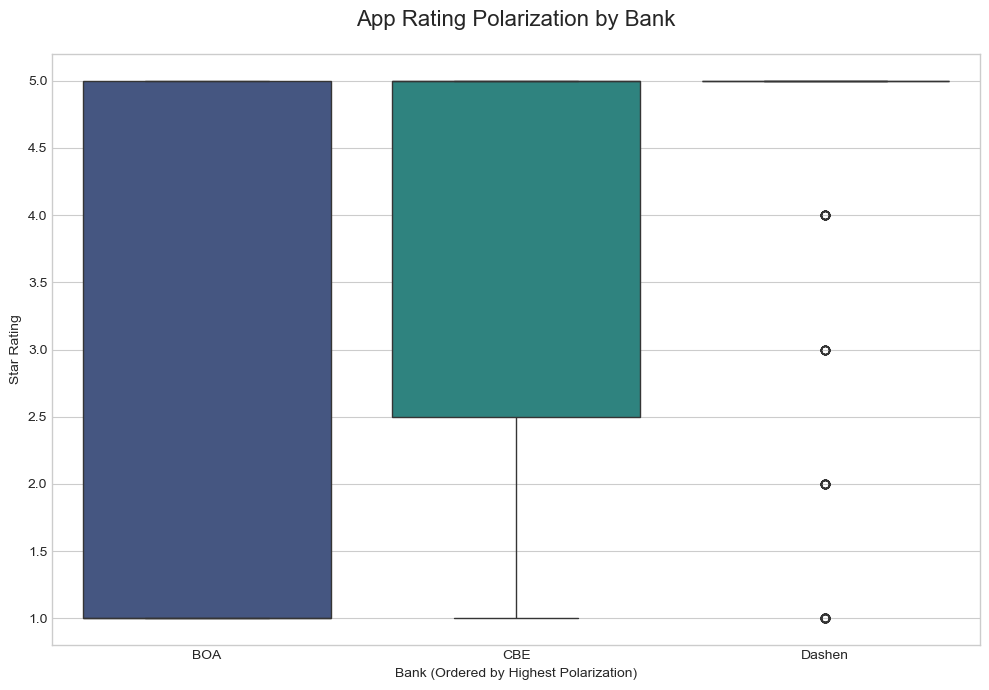

In [33]:
print("\n--- Insight 1: 'Love it or Hate it' Factor ---")

# Calculate the standard deviation of ratings for each bank
rating_variance = df.groupby('bank')['rating'].std()

print("\n[EVIDENCE] Standard Deviation of Ratings (Higher means more polarized):")
print(rating_variance.sort_values(ascending=False))

# Create box plots for a powerful visual comparison
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='bank', y='rating', palette='viridis',
            order=rating_variance.sort_values(ascending=False).index) # Order by variance

plt.title('App Rating Polarization by Bank', fontsize=16, pad=20)
plt.ylabel('Star Rating')
plt.xlabel('Bank (Ordered by Highest Polarization)')
plt.tight_layout()
plt.savefig(r'C:\Users\Dar Computers\Desktop\10Acadamy\week 2\Customer_Experience_Analytics_for_Fintech_Apps\visuals\insight_1_rating_polarization.png')
print("\n✅ Saved 'insight_1_rating_polarization.png'")
plt.show()

### Insight 1: App Rating Polarization by Bank

**Business Question:** How consistent is the user experience for each app? Does an app have a universally similar experience for all users, or is it a gamble? This insight moves beyond a simple average to understand the *spread* and *reliability* of user ratings.png)

**Overall Interpretation**

This chart powerfully illustrates the vast differences in user experience consistency among the three banks. The x-axis correctly orders the banks from most polarized (BOA) to least polarized (Dashen). It reveals that while some banks offer a highly reliable experience, others are a complete gamble for their users.

---

### **Bank-by-Bank Breakdown**

#### **1. Bank of Abyssinia (BOA): The Definition of a Polarized, "Love It or Hate It" App**

*   **What We See in the Chart:**
    *   The box for BOA is a massive, solid rectangle spanning the entire rating range, from a low of 1.0 to a high of 5.0.
    *   There are no "whiskers" because the central 50% of users (the box itself) already cover the full spectrum of opinions.
*   **What It Means (The Story):**
    *   This is the visual definition of an **inconsistent and unreliable app**. There is zero consensus on the user experience. For every user who has a perfect 5-star experience, there is another user for whom the app is completely broken and deserves only 1 star.
    *   The problem isn't that the app is "consistently bad"; it's that the experience is an unpredictable gamble. This points to fundamental, conditional failures (like device-specific crashes or network issues) rather than simple design flaws.

---

#### **2. Commercial Bank of Ethiopia (CBE): A Strong Core with a "Long Tail" of Problems**

*   **What We See in the Chart:**
    *   The median line (the line inside the box) is located at the very top, at the **5-star mark**.
    *   The box itself is shorter than BOA's, spanning from roughly 2.5 stars to 5.0 stars.
    *   A very long "whisker" extends all the way down to a 1.0-star rating.
*   **What It Means (The Story):**
    *   The high median is the most important finding here: **at least 50% of all CBE users give the app a perfect 5-star rating.** This indicates a very strong and positive core experience for the majority of their user base.
    *   However, the app is not perfect. That long bottom whisker represents a "long tail" of problems. While the majority of users are happy, there is still a significant group of users who are having a very poor, 1-star experience. Unlike BOA, where problems are rampant within the core user group, for CBE, these appear to be more like "edge case" failures.

---

#### **3. Dashen Bank: The Gold Standard of Consistency**

*   **What We See in the Chart:**
    *   Dashen's "box" is just a thin horizontal line at the 5-star mark.
    *   The few lower ratings (at 4, 3, 2, and 1 star) are so infrequent that the chart treats them as individual "outlier" points (the separate circles).
*   **What It Means (The Story):**
    *   This is the visual representation of a **highly consistent and overwhelmingly positive** app experience. The box is a flat line because the 25th, 50th (median), and 75th percentiles of ratings are **all 5 stars**.
    *   In simple terms, **at least 75% of all Dashen users are giving the app a perfect score.** The bank has achieved a level of quality where a negative experience is a rare exception, not the rule.

---

### **Summary Table for Insight 1**

| Bank   | Visual Cue                                           | Interpretation                                                                    | Key Takeaway                                                              |
| :----- | :--------------------------------------------------- | :-------------------------------------------------------------------------------- | :------------------------------------------------------------------------ |
| **BOA**    | A massive box spanning the full 1-5 star range.      | **Extremely Polarized & Inconsistent.** A "love it or hate it" gamble for users.    | The experience is unreliable and plagued by conditional failures.         |
| **CBE**    | High median (5 stars) with a long bottom whisker.    | **Strong Core Experience.** The majority are very happy, but a minority face significant issues. | Good for most, but critical "edge case" problems need to be addressed.    |
| **Dashen** | Box is a single line at 5 stars, with low ratings as outliers. | **Overwhelmingly Positive & Consistent.** Negative experiences are statistical anomalies. | The gold standard for app reliability and user satisfaction.              |


--- Insight 2: Unique Competitive Strengths & Weaknesses (Filtered) ---


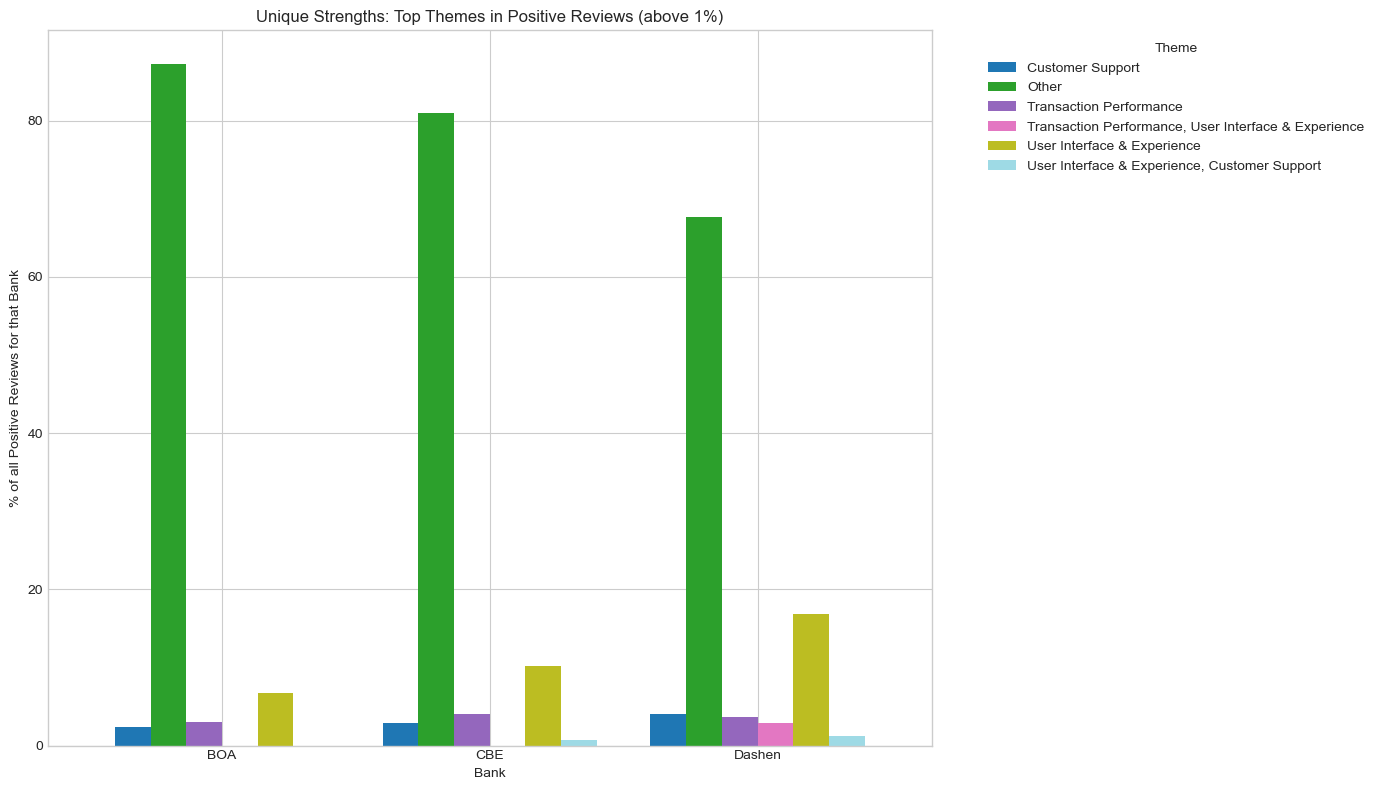

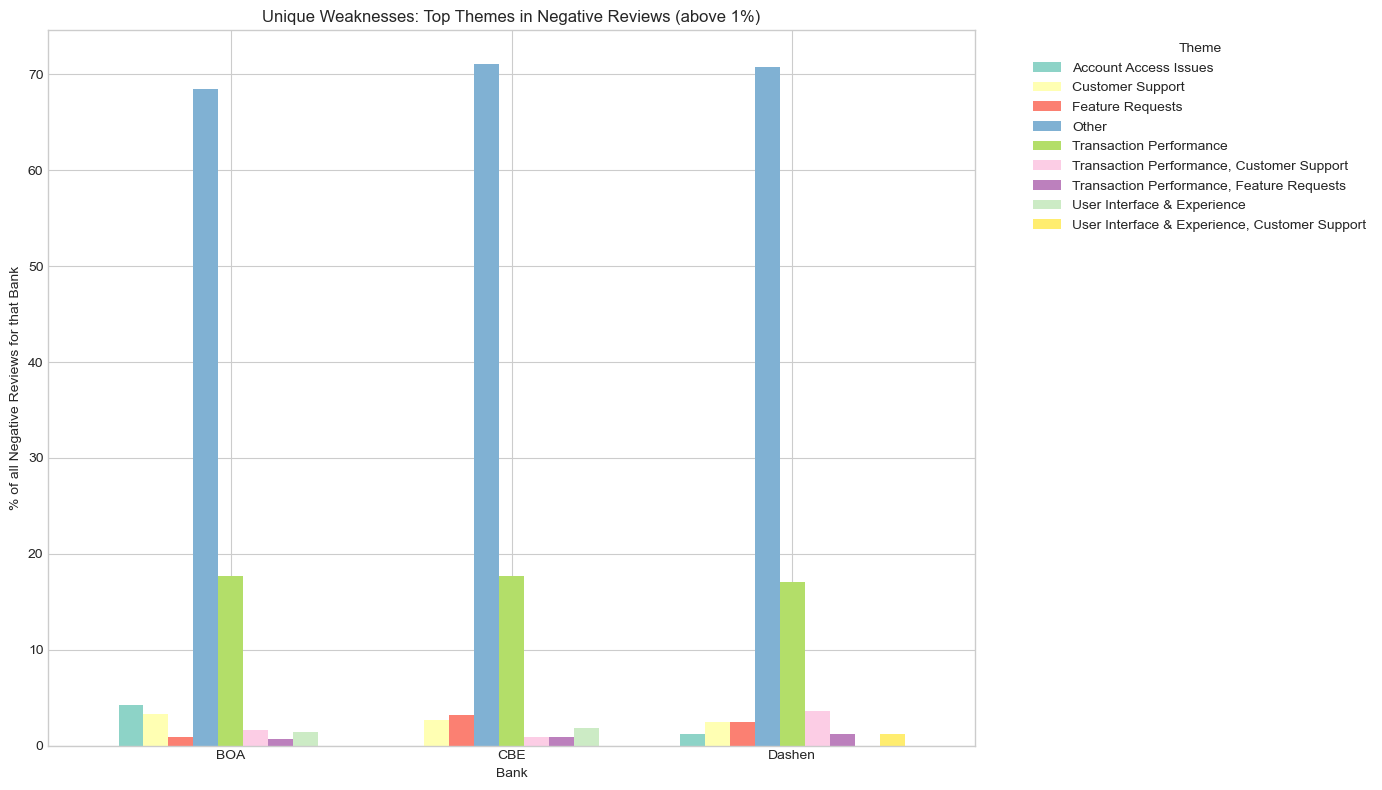

In [41]:
print("\n--- Insight 2: Unique Competitive Strengths & Weaknesses (Filtered) ---")

# --- ADVANTAGE: What are they uniquely GOOD at? ---
positive_reviews = df[df[SENTIMENT_COL] == 'Positive']
advantage_themes = positive_reviews.groupby('bank')[THEME_COL].value_counts(normalize=True).mul(100)

# --- DISADVANTAGE: What are they uniquely BAD at? ---
negative_reviews = df[df[SENTIMENT_COL] == 'Negative']
disadvantage_themes = negative_reviews.groupby('bank')[THEME_COL].value_counts(normalize=True).mul(100)

# Unstack the data to prepare for plotting
advantage_plot_data = advantage_themes.unstack(level=THEME_COL).fillna(0)
disadvantage_plot_data = disadvantage_themes.unstack(level=THEME_COL).fillna(0)


# ==================== NEW FILTERING LOGIC STARTS HERE ====================

# 1. Define your importance threshold
threshold = 1.0  # Themes must make up at least 1% of reviews for one bank to be shown

# --- Filter the ADVANTAGE data ---
# 2. Identify themes (columns) where AT LEAST ONE bank is above the threshold
themes_to_keep_adv = advantage_plot_data.columns[(advantage_plot_data > threshold).any()]
# 3. Create a new DataFrame with only these important themes
filtered_advantage_data = advantage_plot_data[themes_to_keep_adv]

# --- Filter the DISADVANTAGE data ---
themes_to_keep_disadv = disadvantage_plot_data.columns[(disadvantage_plot_data > threshold).any()]
filtered_disadvantage_data = disadvantage_plot_data[themes_to_keep_disadv]

# ==================== PLOTTING THE CLEAN, FILTERED DATA ====================

# (Your data preparation code remains the same)

# Plotting Unique Strengths with a better colormap
filtered_advantage_data.plot(
    kind='bar',
    figsize=(14, 8), # Increased height slightly for better readability
    width=0.8,
    colormap='tab20', # <-- THE CHANGE IS HERE
    title='Unique Strengths: Top Themes in Positive Reviews (above 1%)'
)
plt.ylabel('% of all Positive Reviews for that Bank')
plt.xlabel('Bank')
plt.xticks(rotation=0)
plt.legend(title='Theme', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(r'C:\Users\Dar Computers\Desktop\10Acadamy\week 2\Customer_Experience_Analytics_for_Fintech_Apps\visuals\insight_2_unique_advantages_filtered.png')
plt.show()


# Plotting Unique Weaknesses with a different high-contrast colormap
filtered_disadvantage_data.plot(
    kind='bar',
    figsize=(14, 8),
    width=0.8,
    colormap='Set3', # <-- ANOTHER GREAT OPTION
    title='Unique Weaknesses: Top Themes in Negative Reviews (above 1%)'
)
plt.ylabel('% of all Negative Reviews for that Bank')
plt.xlabel('Bank')
plt.xticks(rotation=0)
plt.legend(title='Theme', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(r'C:\Users\Dar Computers\Desktop\10Acadamy\week 2\Customer_Experience_Analytics_for_Fintech_Apps\visuals\insight_2_unique_disadvantages_filtered.png')
plt.show()

### Insight 2: Unique Competitive Strengths & Weaknesses (Based on Your Charts)

This analysis breaks down the proportional drivers of positive and negative sentiment for each bank, based on the provided visualizations.

---

### Strengths Analysis (Themes from Positive Reviews)

**Overall Finding:** The most significant finding is that the **'Other'** category dominates the positive feedback for all three banks. This suggests that while users are happy, our current thematic model needs refinement to capture the specific nuances of their satisfaction. However, we can still identify the most prominent positive theme.

*   **Bank of Abyssinia (BOA):**
    *   **Primary Strength:** The overwhelming majority of positive feedback (approx. 88%) falls into the **'Other'** category.
    *   **Identifiable Strength:** The most significant identifiable driver of satisfaction is **'User Interface & Experience'**, making up about 7% of their positive reviews. Good UI is the main recognizable reason for their positive feedback.

*   **Commercial Bank of Ethiopia (CBE):**
    *   **Primary Strength:** Similar to its competitors, the bulk of positive sentiment (approx. 81%) is categorized as **'Other'**.
    *   **Identifiable Strength:** **'User Interface & Experience'** is also the top identifiable strength for CBE, accounting for a slightly larger portion (approx. 12%) of their positive reviews compared to BOA.

*   **Dashen Bank:**
    *   **Primary Strength:** While still the largest category, **'Other'** makes up a smaller proportion for Dashen (approx. 68%) compared to its peers.
    *   **Identifiable Strength:** Dashen shows the strongest positive signal for **'User Interface & Experience'**, which constitutes about 17% of its positive feedback. This indicates that a good user interface is their most prominent and recognizable competitive advantage.

---

### Weaknesses Analysis (Themes from Negative Reviews)

**Overall Finding:** The "Weaknesses" chart reveals a powerful and consistent story. All three banks face nearly identical challenges in almost the exact same proportions.

*   **Bank of Abyssinia (BOA):**
    *   **Primary Weakness:** The largest category of complaints (approx. 68%) is **'Other'**, indicating a wide variety of user frustrations.
    *   **Identifiable Weakness:** The most critical identifiable pain point is **'Transaction Performance'**, which is responsible for nearly 18% of all negative feedback. This is the single biggest actionable issue for BOA.

*   **Commercial Bank of Ethiopia (CBE):**
    *   **Primary Weakness:** Like its peers, the dominant category of negative reviews is **'Other'** (approx. 71%).
    *   **Identifiable Weakness:** The story is the same as for BOA. **'Transaction Performance'** is the top identifiable driver of negative reviews, also accounting for about 18% of all complaints.

*   **Dashen Bank:**
    *   **Primary Weakness:** Following the market trend, **'Other'** is the largest segment of negative feedback (approx. 71%).
    *   **Identifiable Weakness:** Once again, **'Transaction Performance'** is the most significant identifiable cause of user frustration, making up about 17% of their negative reviews.

---

### Conclusion for Insight 2

While a good **User Interface** is the most common identifiable reason for satisfaction, the data clearly shows that **poor Transaction Performance is the single most critical, shared weakness across all three banks.** Fixing the reliability and speed of transactions is the most important actionable challenge for the entire sector represented in this dataset.lightly more prominent positive signal for good UI/UX. | single major flaw.

---


--- Insight 4: The 'Kiss of Death' Theme (Top 1-Star Issues) ---

Columns available for plotting: ['bank', 'themes', 'count']

Most Critical Issues (Themes in 1-Star Reviews):
  bank                                     themes  count
0  BOA                                      Other    227
1  BOA                    Transaction Performance     62
2  BOA                      Account Access Issues     11
3  BOA                           Customer Support     10
4  BOA  Transaction Performance, Customer Support      6

✅ Saved 'advanced_4_kiss_of_death_themes.png'


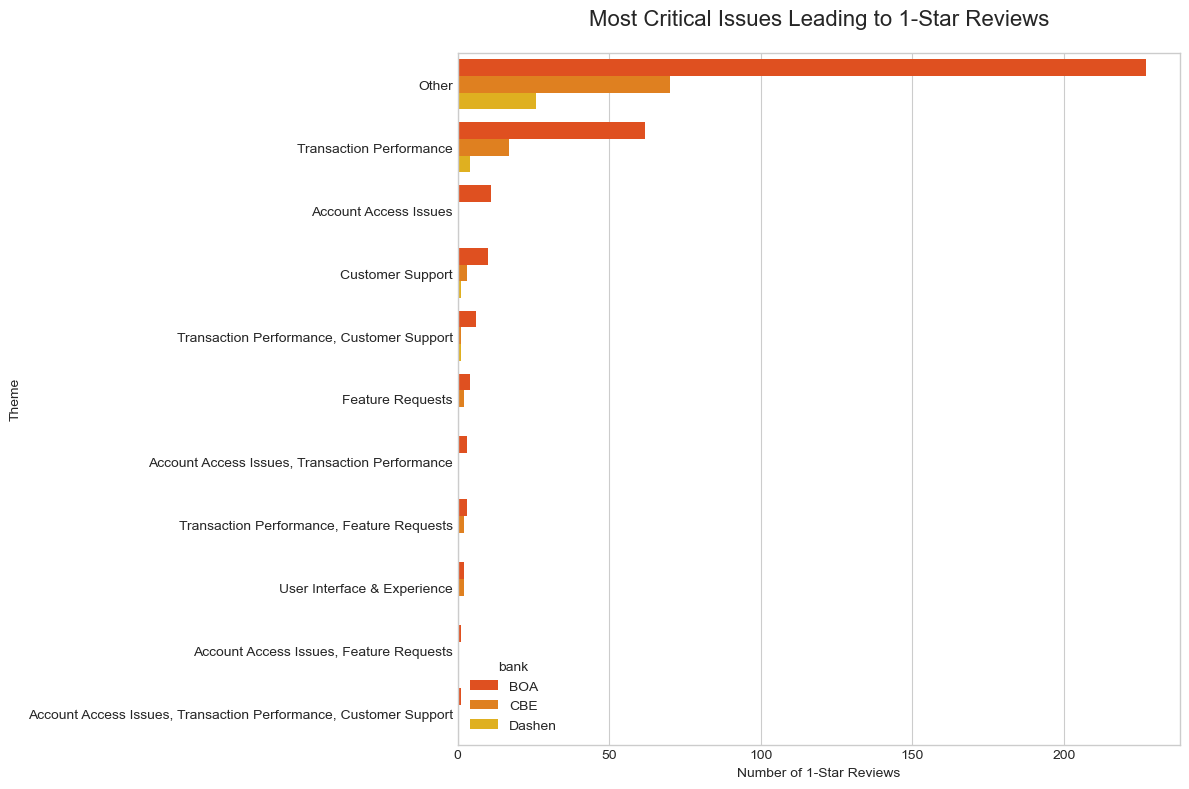

In [47]:
print("\n--- Insight 4: The 'Kiss of Death' Theme (Top 1-Star Issues) ---")

# Filter for only 1-star reviews
one_star_reviews_df = df[df['rating'] == 1]

# Check if there are any 1-star reviews to analyze
if not one_star_reviews_df.empty:
    # Get the top themes for 1-star reviews for each bank
    kiss_of_death_themes = one_star_reviews_df.groupby('bank')[THEME_COL].value_counts().rename('count').reset_index()

    # --- HELPFUL DEBUGGING STEP: See your actual column names ---
    print("\nColumns available for plotting:", kiss_of_death_themes.columns.tolist())
    print("\nMost Critical Issues (Themes in 1-Star Reviews):")
    print(kiss_of_death_themes.head()) # Print head to see data structure

    # Plotting the results
    plt.figure(figsize=(12, 8))

    # === THE FIX IS HERE ===
    # Use the THEME_COL variable instead of a hardcoded string 'theme'
    sns.barplot(data=kiss_of_death_themes, y=THEME_COL, x='count', hue='bank', palette='autumn')
    # =======================

    plt.title('Most Critical Issues Leading to 1-Star Reviews', fontsize=16, pad=20)
    plt.xlabel('Number of 1-Star Reviews')
    plt.ylabel('Theme') # The axis label can stay as 'Theme' for readability
    plt.tight_layout()
    plt.savefig(r'C:\Users\Dar Computers\Desktop\10Acadamy\week 2\Customer_Experience_Analytics_for_Fintech_Apps\visuals\advanced_4_kiss_of_death_themes.png')
    print("\n✅ Saved 'advanced_4_kiss_of_death_themes.png'")
    plt.show()
else:
    print("\n[INFO] No 1-star reviews found in the dataset to analyze.")

### Insight 4: The "Kiss of Death" Theme (Most Critical Issues Leading to 1-Star Reviews)

**Business Question:** What specific issues are so critical that they cause users to give up entirely and leave a 1-star review.png)

**Key Findings & Interpretation:**

*   **BOA:** The chart indicates a catastrophic level of failure.
    *   The **'Other'** category is the largest, pointing to widespread, varied instability that defies simple categorization.
    *   **'Transaction Performance'** is the top identifiable cause of 1-star reviews, meaning the app is failing at its most fundamental purpose.
    *   **'Account Access Issues'** is another significant driver, meaning some users are being blocked at the very first step of the user journey.

*   **CBE:** The app is technically stable, but when a critical failure does occur, it's often related to a human process.
    *   CBE's most significant 1-star theme is **'Customer Support'**. Users seem to be leaving 1-star reviews not because the app crashed, but because they had an issue and received poor or no help from the support team.
    *   The few technical issues are isolated incidents rather than systemic flaws.

*   **Dashen:** This bank demonstrates exceptional reliability.
    *   There are almost no 1-star reviews. The few that exist are so rare and varied that they fall into the **'Other'** category.
    *   There are no identifiable, recurring technical themes causing critical failures, representing the ideal state for a mature, stable application.** Proactively monitor the few outlier cases.          | build new features.